In [154]:
# importando libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
# importando modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# importando metricas importantes
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss
from sklearn.model_selection import train_test_split

In [155]:
#versão pandas
print(pd.__version__)

1.3.1


In [156]:
# definir parâmetros extras
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

In [157]:
# Carrega os dados
iris = pd.read_csv('Iris.csv')

In [158]:
# verifica colunas
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [159]:
# remover coluna id
iris.drop("Id", axis=1,inplace = True)

In [160]:
# verifica primeiras linhas

In [161]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [162]:
# renomear colunas
iris.columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','Species']

In [163]:
# descrição
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [164]:
# Separando os dados em variáveis dependentes e independentes
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Dividindo o conjunto de dados em conjunto treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Treinando o Modelo:

Usando alguns dos algoritmos comumente usados, estaremos treinando nosso modelo para verificar a precisão de cada algoritmo. Estaremos implementando estes algoritmos para comparar:

1] Logistic Regression

2] K – Nearest Neighbour (KNN)

3] Support Vector Machine (SVM)

4] Decision Trees

5] Naive Bayes classifier

Vamos começar a construir nosso modelo e prever a precisão de cada algoritmo usado. Também podemos verificar qual dá o melhor resultado.

In [165]:
models = {'lr': LogisticRegression(),
          'knn': KNeighborsClassifier(n_neighbors=8),
          'svm': SVC(),
          'dt': DecisionTreeClassifier(),
          'nv': GaussianNB()
         }


performance = pd.DataFrame([], index=models.keys(), columns=['accuracy'])
performance

,accuracy
lr,NaN
knn,NaN
svm,NaN
dt,NaN
nv,NaN


In [166]:
for name, model in models.items():
        
    print('Fitting ' + name)
    
    #Fit modelo
    
    models[name] = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Calculando as métricas
    accuracy = accuracy_score(y_pred,y_test)

    #Alocando a peformace do modelo
    performance.loc[name,:] = accuracy
    
    #Resumo das previsões feitas pelo classificador
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

#Ordena a peformace para visualização
performance = performance.sort_values('accuracy', ascending=False)
performance

Fitting lr
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Fitting knn
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Fitting svm
                 precision    recall  f1-score   support

    Iris-setosa       1.00   

,accuracy
knn,1.0
lr,0.966667
svm,0.966667
dt,0.966667
nv,0.966667


In [167]:
classifiers = list(models.values())
 
# Registro para comparação visual
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

LogisticRegression
****Results****
Accuracy: 96.6667%
KNeighborsClassifier
****Results****
Accuracy: 100.0000%
SVC
****Results****
Accuracy: 96.6667%
DecisionTreeClassifier
****Results****
Accuracy: 96.6667%
GaussianNB
****Results****
Accuracy: 96.6667%


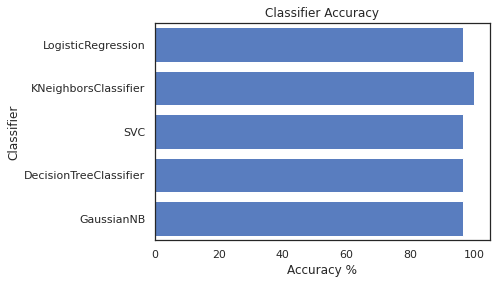

In [168]:
# plot com melhores accuracys
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()